## Analysis of Trends in Censored Tweets

In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'parsed-files/write-folder/tweet_text.csv'
data = pd.read_csv(file_path)

data

,id,lang,text
0,991433704575852544,en,More photos of police brutality today in Istan...
1,991686033669488640,tr,@Umit_Burcundan Kesinlikle Katılmadığım Bir Fi...
2,991691846731649025,tr,"Hizmet insanları için ""aklını kira verenler"" i..."
3,991102360733745157,tr,Sn. @UVeraTuna hanımefendi vefat eden #EsmaUlu...
4,991694254278959104,tr,"AYM, cezaevinde kitap yasağını hukuka aykırı b..."
...,...,...,...
211,991708914029940736,tr,Rahmetli Esma Uludağ Hanımefendi'nin en son me...
212,991314489885839360,und,https://t.co/vfV6Yltdoy
213,991766893638946822,tr,Türkiye siyaseti arkaik milliyetçiliğin kuşatm...
214,984469208888045568,ar,مترجم محارم من تحت الغطاء - طيز زوجة ابي الك...


Censored tweets by language in dataset

In [3]:
data['lang'].value_counts()

lang
en     81
tr     78
und    21
es     10
de      7
ar      5
ja      4
fr      3
uk      2
in      2
ur      1
ca      1
ko      1
Name: count, dtype: int64

Consider English language tweets only:

In [4]:
english_tweets = data[data['lang'] == 'en']['text']

english_tweets

0      More photos of police brutality today in Istan...
5      "End DACA, unlawful from the get go!'  @POTUS ...
6      You know you’re a Leftist Democrat, when you a...
7      Liberal hate makes them look like jackasses. h...
9      Recently, one of my friends and his son tried ...
                             ...                        
206    The Muslim Brotherhood infiltrated the Boy Sco...
207    A graphical comparison of political violence. ...
208    Mah goodness. Dare to correct a racist and the...
209    Imagine being such a brainwashed weak minded f...
210           like if you get it https://t.co/2osje0lPGm
Name: text, Length: 81, dtype: object

### Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF Vectorizer to convert text data into numerical data
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(english_tweets)

# Apply NMF for topic modeling with an estimated number of topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=1)
nmf_model.fit(tfidf)

# Extract the top words for each topic
words = tfidf_vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    topics.append(top_words)

topics

[['new',
  'message',
  'romliv',
  'government',
  'don',
  'trump',
  'right',
  'language',
  'speaks',
  'https'],
 ['kurds',
  'death',
  'syria',
  'brotherhood',
  'jihadists',
  'racist',
  'think',
  'wednesdaywisdom',
  'political',
  'amp'],
 ['inclusive',
  'bsa',
  'allowed',
  'girls',
  'girl',
  'scout',
  'boy',
  'muslim',
  'troops',
  'scouts'],
 ['spent',
  'want',
  'displaced',
  'realdonaldtrump',
  'kurds',
  'time',
  'kurdish',
  'turkey',
  'people',
  'just'],
 ['whcd',
  'political',
  'women',
  'leftist',
  'recognize',
  'democrat',
  'god',
  'keepamericagreat',
  'https',
  'like']]

In [6]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')  # to ignore common english words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Most frequent words across all English censored tweets:

In [7]:
all_text = ' '.join(english_tweets.astype(str))

cleaned_text = re.sub(r'http\S+|[^a-zA-Z\s]', '', all_text)  # remove special characters

words = cleaned_text.lower().split()

stop_words = set(stopwords.words('english'))

filtered_words = [word for word in words if word not in stop_words and word != 'amp']

word_counts = Counter(filtered_words) # Count the frequency of each word

most_common_words = word_counts.most_common(10) # Get the most common words

print(most_common_words)

[('scouts', 10), ('kurds', 10), ('muslim', 9), ('boy', 7), ('girl', 7), ('troops', 7), ('people', 7), ('allowed', 6), ('kurdish', 6), ('scout', 6)]


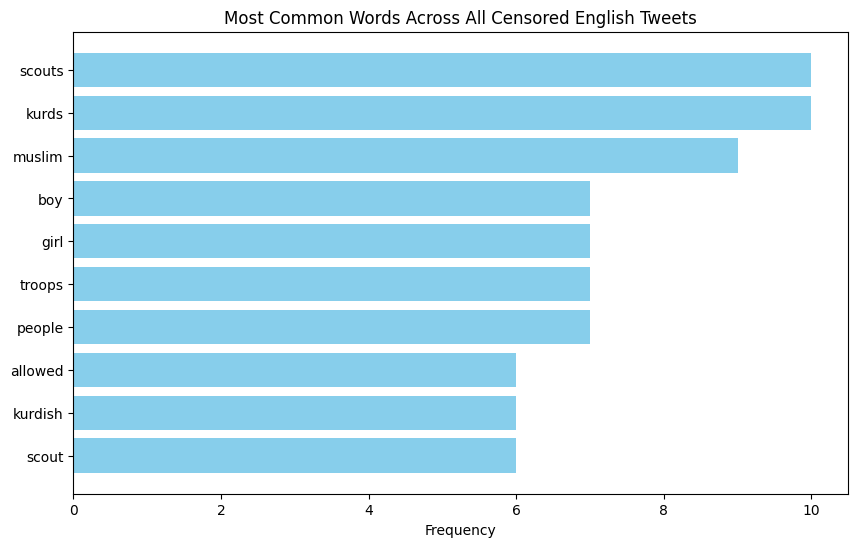

In [8]:
import matplotlib.pyplot as plt

words_list = []
counts_list = []

for i in most_common_words:
    words, counts = i
    words_list.append(words)
    counts_list.append(counts)

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.barh(words_list, counts_list, color='skyblue')
plt.xlabel("Frequency")
plt.title("Most Common Words Across All Censored English Tweets")
plt.gca().invert_yaxis()  # to show most frequent word at top
plt.show()


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # pre-trained model in NLTK library used for tokenizing text

documents = english_tweets.astype(str).tolist()

# Preprocess text
stop_words = set(stopwords.words('english'))
processed_docs = []
for doc in documents:
    cleaned_doc = re.sub(r'http\S+|[^a-zA-Z\s]', '', doc)
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(cleaned_doc.lower()) if word not in stop_words and len(word) > 2 and word != 'amp']
    processed_docs.append(' '.join(tokens))

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print topics
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['think', 'syria', 'happening', 'homes', 'white', 'trump', 'afrin', 'turkey', 'racist', 'kurds']
Topic #2:
['lets', 'make', 'efrin', 'day', 'displaced', 'realdonaldtrump', 'war', 'kurdish', 'time', 'people']
Topic #3:
['political', 'goals', 'america', 'dont', 'scouts', 'president', 'god', 'speaks', 'language', 'muslim']
Topic #4:
['want', 'message', 'man', 'whcd', 'thats', 'children', 'end', 'years', 'like', 'use']
Topic #5:
['inclusive', 'bsa', 'new', 'girls', 'allowed', 'boy', 'girl', 'scout', 'troops', 'scouts']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The above 5 topics can be renamed as:
1. Middle Eastern Politics
2. 
3. Political & Cultural Discourse
4. 
5. Culture war debate (in this specific case inclusivity in Boy Scouts)